In [63]:
import pandas as pd
import os

folder_path = 'source_data'
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

combined_data = pd.DataFrame()

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path)
    combined_data = pd.concat([combined_data, data])

# replace the value 'T' in the last three columns with 0
combined_data.replace('T', 0, inplace=True)
combined_data.reset_index(drop=True, inplace=True)

#relable the columns to make them more readable
combined_data.columns = ['date', 'max_temp', 'min_temp', 'precipitation', 'snow', 'snow_depth']

#convert the columns to numeric
combined_data['max_temp'] = pd.to_numeric(combined_data['max_temp'], errors='coerce')
combined_data['min_temp'] = pd.to_numeric(combined_data['min_temp'], errors='coerce')
combined_data['precipitation'] = pd.to_numeric(combined_data['precipitation'], errors='coerce')
combined_data['snow'] = pd.to_numeric(combined_data['snow'], errors='coerce')
combined_data['snow_depth'] = pd.to_numeric(combined_data['snow_depth'], errors='coerce')


# Convert the 'date' column to datetime format
combined_data['date'] = pd.to_datetime(combined_data['date'])

# Extract the month from the 'date' column
combined_data['month'] = combined_data['date'].dt.month

# extract the year from the 'date' column
combined_data['year'] = combined_data['date'].dt.year

# create a new column called daily_avg that contains the average of the 'max_temp' and 'min_temp' columns
combined_data['daily_avg'] = (combined_data['max_temp'] + combined_data['min_temp']) / 2

# create a new column called 'freezing' that indicates whether the 'min_temp' column is below freezing (32°F)
combined_data['low_freezing'] = combined_data['min_temp'] < 32

# create a new column called 'high_freezing' that indicates whether the 'max_temp' column is below freezing (32°F)
combined_data['high_freezing'] = combined_data['max_temp'] < 32

# create a new column called 'avg_freezing' that indicates whether the 'daily_avg' column is below freezing (32°F)
combined_data['avg_freezing'] = combined_data['daily_avg'] < 32

combined_data['day_of_year'] = combined_data['date'].dt.dayofyear

# Take the average of the 'max_temp', 'min_temp', 'precipitation', 'snow', and 'snow_depth' columns for each month; and the sum of the two freezing columns
monthly_data = combined_data.groupby(['year', 'month']).agg({'max_temp': 'mean', 'min_temp': 'mean', 'daily_avg': 'mean', 'precipitation': 'mean', 'snow': 'mean', 'snow_depth': 'mean', 'low_freezing': 'sum', 'high_freezing': 'sum', 'avg_freezing': 'sum'})


# Save the combined data to a new csv file
monthly_data.to_csv('monthly_data.csv')


# 1970 to 1999; 2000 to 2009; 2010 to 2019; and 2020 onward.

# Create a new column called bins that will categorize the data into the four time periods: 1970 to 1999; 2000 to 2009; 2010 to 2019; and 2020 onward.
bins = [1969, 1999, 2009, 2019, 2021]
labels = ['1970-1999', '2000-2009', '2010-2019', '2020-onward']
monthly_data['bins'] = pd.cut(monthly_data.index.get_level_values(0), bins=bins, labels=labels)

# Take the average of the 'max_temp', 'min_temp', 'precipitation', 'snow', 'snow_depth' , and 'freezing' columns for each month and bin
monthly_data_bin = monthly_data.groupby(['bins', 'month']).mean()

# Save the combined data to a new csv file
monthly_data_bin.to_csv('monthly_data_bin.csv')


In [61]:
monthly_data

max_temp   min_temp  daily_avg  precipitation      snow  \
year month                                                             
1970 1      14.580645  -3.516129   5.532258       0.015161  0.316129   
     2      25.821429   4.857143  15.339286       0.005714  0.153571   
     3      33.612903  18.387097  26.000000       0.066129  0.277419   
     4      55.766667  36.400000  46.083333       0.118333  0.043333   
     5      68.064516  48.806452  58.435484       0.153871  0.000000   
...               ...        ...        ...            ...       ...   
2024 6      78.366667  60.533333  69.450000       0.242333  0.000000   
     7      82.548387  65.709677  74.129032       0.180968  0.000000   
     8      80.161290  62.870968  71.516129       0.173226  0.000000   
     9      80.800000  59.933333  70.366667       0.002000  0.000000   
     10     67.733333  45.933333  56.833333       0.000000  0.000000   

            snow_depth  low_freezing  high_freezing  avg_freezing       bins  
year month                                                                    
1970 1       18.709677            31             27            30  1970-1999  
     2       13.785714            28             17            27  1970-1999  
     3        4.774194            31             13            25  1970-1999  
     4        0.000000             7              0             3  1970-1999  
     5        0.000000             0              0             0  1970-1999  
...                ...           ...            ...           ...        ...  
2024 6        0.000000             0              0             0        NaN  
     7        0.000000             0              0             0        NaN  
     8        0.000000             0              0             0        NaN  
     9        0.000000             0              0             0        NaN  
     10       0.000000             0              0             0        NaN  

[658 rows x 10 columns]

C:\Users\JakeSelvey\AppData\Local\Temp\ipykernel_16992\3802973129.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['avg_freezing_shifted'] = filtered_data['avg_freezing'].shift(1)
C:\Users\JakeSelvey\AppData\Local\Temp\ipykernel_16992\3802973129.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['avg_freezing_shifted_2'] = filtered_data['avg_freezing'].shift(2)


Timestamp('1970-11-24 00:00:00')

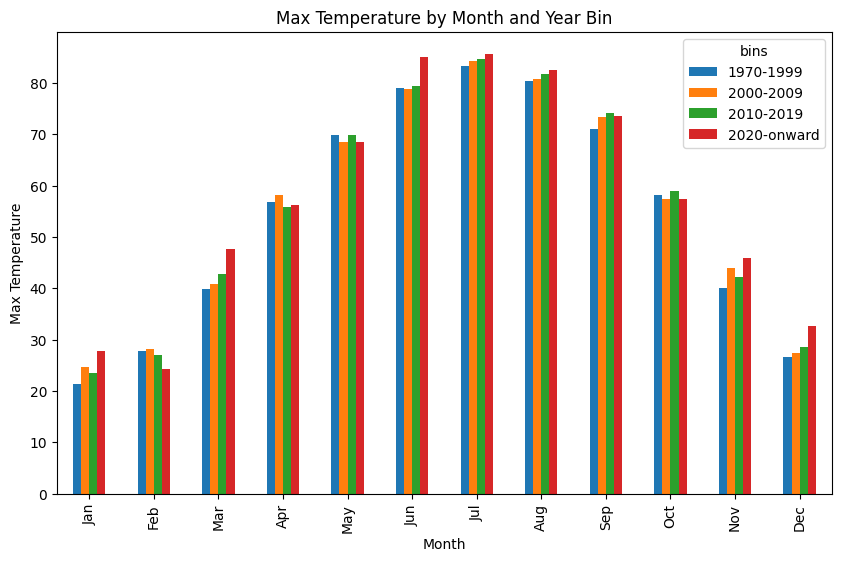

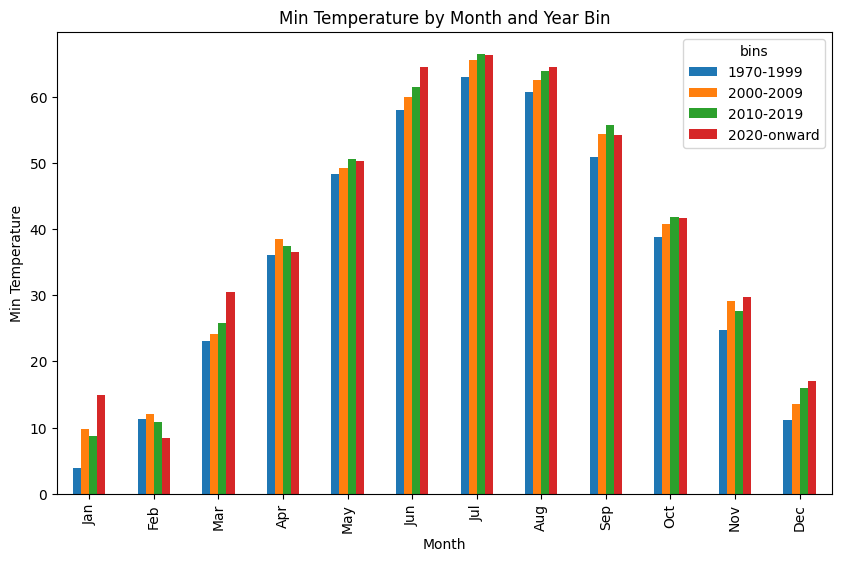

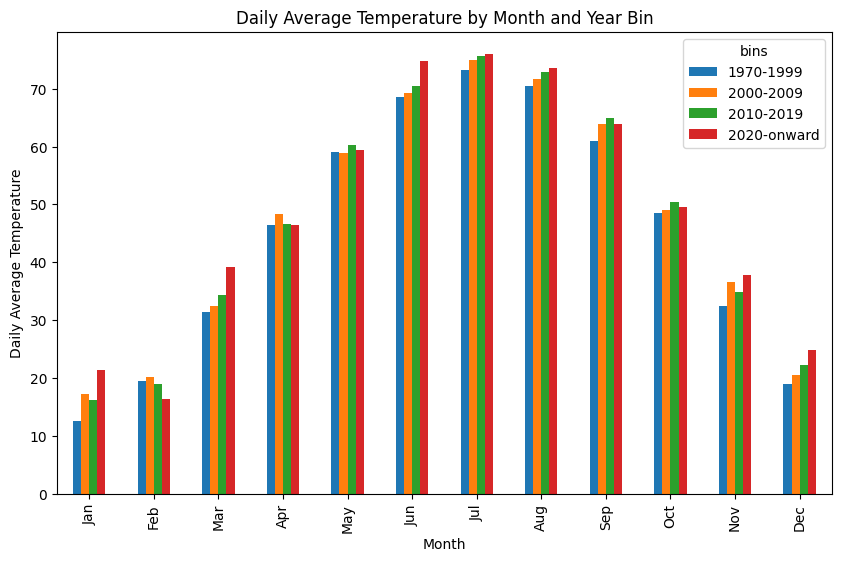

In [57]:
#plot the binned data by month for each year bin.  Only plotting the max_temp column. Make sure months are labeled on x axis  Do not use seaborn.
import matplotlib.pyplot as plt

#create a bar plot of the same
fig, ax = plt.subplots(figsize=(10, 6))
monthly_data_bin.reset_index().pivot(index='month', columns='bins', values='max_temp').plot(kind='bar', ax=ax)
plt.xlabel('Month')
plt.ylabel('Max Temperature')
plt.title('Max Temperature by Month and Year Bin')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

#Do the same for the min_temp column
fig, ax = plt.subplots(figsize=(10, 6))
monthly_data_bin.reset_index().pivot(index='month', columns='bins', values='min_temp').plot(kind='bar', ax=ax)
plt.xlabel('Month')
plt.ylabel('Min Temperature')
plt.title('Min Temperature by Month and Year Bin')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

#do the same with the daily_avg column
fig, ax = plt.subplots(figsize=(10, 6))
monthly_data_bin.reset_index().pivot(index='month', columns='bins', values='daily_avg').plot(kind='bar', ax=ax)
plt.xlabel('Month')
plt.ylabel('Daily Average Temperature')
plt.title('Daily Average Temperature by Month and Year Bin')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


